# Installation

In [1]:
basedir = '.'

In [2]:
!conda install -c conda-forge ncbi-datasets-cli

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ncbi-datasets-cli


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    libgcc-14.1.0              |       h77fa898_1         827 KB  conda-forge
    libgcc-ng-14.1.0           |       h69a702a_1          51 KB  conda-forge
    libgomp-14.1.0             |       h77fa898_1         449 KB  conda-forge
    ncbi-datasets-cli-16.31.0  |       ha770c72_0        16.0 MB  conda-forge
   

In [5]:
!pip3 install cython bottle brotli numpy PyQt6

  Using cached Cython-3.0.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
Using cached Cython-3.0.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.6/284.6 kB 17.3 MB/s eta 0:00:00


In [41]:
!pip install fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.2 MB/s eta 0:00:00


In [43]:
! pip install pysam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 40.6 MB/s eta 0:00:00


# Importing

In [2]:
import os
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import pandas as pd
import json
import pysam
import pickle
from sklearn.manifold import TSNE
from transformers import AutoTokenizer, BigBirdForMaskedLM

In [3]:
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [4]:
torch.__version__

'1.10.0+cu102'

In [5]:
import sklearn
sklearn.__version__

'1.3.2'

In [6]:
import transformers
transformers.__version__

'4.17.0'

In [7]:
pd.__version__

'1.2.3'

# Downloading genomes

In [8]:
genomes_df = pd.read_csv(os.path.join(basedir,"2023-08-10 19:40:52.828317species_extended_metadata.csv"))
genomes_df

,Unnamed: 0,species,accession,current_accession,source_database,assembly_info.assembly_level,assembly_info.assembly_name,assembly_info.assembly_status,assembly_info.assembly_type,assembly_info.refseq_category,...,assembly_stats.contig_n50,assembly_stats.gc_count,assembly_stats.gc_percent,assembly_stats.number_of_component_sequences,assembly_stats.number_of_contigs,assembly_stats.total_sequence_length,assembly_stats.total_ungapped_length,organism.organism_name,organism.tax_id,why_selected
0,0,homo_sapiens,GCF_000001405.40,GCF_000001405.40,SOURCE_DATABASE_REFSEQ,Chromosome,GRCh38.p14,current,haploid-with-alt-loci,reference genome,...,57879411,1374283647,40.5,35611,996,3099441038,2948318359,Homo sapiens,9606,model species
1,1,pan_troglodytes,GCF_028858775.1,GCF_028858775.1,SOURCE_DATABASE_REFSEQ,Chromosome,NHGRI_mPanTro3-v1.1-hic.freeze_pri,current,haploid,representative genome,...,94528342,1319110838,40.5,1500,1500,3225356997,3222180001,Pan troglodytes,9598,model species
2,2,mus_musculus,GCF_000001635.27,GCF_000001635.27,SOURCE_DATABASE_REFSEQ,Chromosome,GRCm39,current,haploid,reference genome,...,59462871,1573609204,41.5,21254,305,2728206152,2654605538,Mus musculus,10090,model species
3,3,gallus_gallus,GCF_016699485.2,GCF_016699485.2,SOURCE_DATABASE_REFSEQ,Chromosome,bGalGal1.mat.broiler.GRCg7b,current,haploid,representative genome,...,18834961,443093403,42.0,676,676,1053315467,1049931549,Gallus gallus,9031,model species
4,4,danio_rerio,GCF_000002035.6,GCF_000002035.6,SOURCE_DATABASE_REFSEQ,Chromosome,GRCz11,current,haploid-with-alt-loci,reference genome,...,1422317,545845483,36.5,31634,19725,1373454788,1368765506,Danio rerio,7955,model species
5,5,drosophila_melanogaster,GCF_000001215.4,GCF_000001215.4,SOURCE_DATABASE_REFSEQ,Chromosome,Release 6 plus ISO1 MT,current,haploid,reference genome,...,21485538,59886014,42.0,1869,2441,143706478,142553500,Drosophila melanogaster,7227,model species
6,6,caenorhabditis_elegans,GCF_000002985.6,GCF_000002985.6,SOURCE_DATABASE_REFSEQ,Complete Genome,WBcel235,current,haploid,reference genome,...,17493829,36545374,35.0,3267,6,100272607,100272607,Caenorhabditis elegans,6239,model species
7,7,saccharomyces_cerevisiae,GCF_000146045.2,GCF_000146045.2,SOURCE_DATABASE_REFSEQ,Complete Genome,R64,current,haploid,reference genome,...,924431,4623000,38.0,16,16,12071326,12071326,Saccharomyces cerevisiae S288C,559292,model species
8,8,arabidopsis_thaliana,GCF_000001735.4,GCF_000001735.4,SOURCE_DATABASE_REFSEQ,Chromosome,TAIR10.1,current,haploid,reference genome,...,11194537,42859753,36.0,5,100,119146348,118960704,Arabidopsis thaliana,3702,model species
9,9,escherichia_coli,GCF_000008865.2,GCF_000008865.2,SOURCE_DATABASE_REFSEQ,Complete Genome,ASM886v2,current,haploid,reference genome,...,5498578,2824389,50.0,3,3,5594605,5594605,Escherichia coli O157:H7 str. Sakai,386585,model species


In [36]:
for ind,row in genomes_df.iterrows():
    sp = row.species
    acc = row.accession
    print (sp, acc)
    !mkdir -p {basedir}/genomes/{sp}
    !datasets download genome accession {acc} --include genome --filename {basedir}/genomes/{sp}/{sp}.zip
    !unzip -d {basedir}/genomes/{sp} {basedir}/genomes/{sp}/{sp}.zip

Streaming output truncated to the last 5000 lines.
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s
Downloading: ./genomes/sinocyclocheilus_grahami/sinocyclocheilus_grahami.zip    476MB 5.81MB/s

# Getting embeddings

In [2]:
dir_content = os.listdir('./genomes/')
dir_content

['salmo_salar',
 'danio_rerio',
 'caenorhabditis_elegans',
 'carassius_auratus',
 'ursus_americanus',
 'mus_musculus',
 'otolemur_garnettii',
 'ciona_savignyi',
 'arabidopsis_thaliana',
 'homo_sapiens',
 'loxodonta_africana',
 'haplochromis_burtoni',
 'ictidomys_tridecemlineatus',
 'sinocyclocheilus_grahami',
 'escherichia_coli',
 'tursiops_truncatus',
 'mandrillus_leucophaeus',
 'taeniopygia_guttata',
 'cricetulus_griseus_chok1gshd',
 'gallus_gallus',
 'jaculus_jaculus',
 'hucho_hucho',
 'drosophila_melanogaster',
 'latimeria_chalumnae',
 'saccharomyces_cerevisiae',
 'pan_troglodytes',
 'amphiprion_percula']

In [9]:
# in case you get something different in previous cell
dir_content = ['salmo_salar',
 'danio_rerio',
 'caenorhabditis_elegans',
 'carassius_auratus',
 'ursus_americanus',
 'mus_musculus',
 'otolemur_garnettii',
 'ciona_savignyi',
 'arabidopsis_thaliana',
 'homo_sapiens',
 'loxodonta_africana',
 'haplochromis_burtoni',
 'ictidomys_tridecemlineatus',
 'sinocyclocheilus_grahami',
 'escherichia_coli',
 'tursiops_truncatus',
 'mandrillus_leucophaeus',
 'taeniopygia_guttata',
 'cricetulus_griseus_chok1gshd',
 'gallus_gallus',
 'jaculus_jaculus',
 'hucho_hucho',
 'drosophila_melanogaster',
 'latimeria_chalumnae',
 'saccharomyces_cerevisiae',
 'pan_troglodytes',
 'amphiprion_percula']

In [10]:
len(dir_content)

27

In [11]:
tokenizer = AutoTokenizer.from_pretrained('AIRI-Institute/gena-lm-bigbird-base-t2t')
model = BigBirdForMaskedLM.from_pretrained('AIRI-Institute/gena-lm-bigbird-base-t2t', output_hidden_states=True)

In [12]:
model.eval()

BigBirdForMaskedLM(
  (bert): BigBirdModel(
    (embeddings): BigBirdEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=3)
      (position_embeddings): Embedding(4096, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BigBirdEncoder(
      (layer): ModuleList(
        (0): BigBirdLayer(
          (attention): BigBirdAttention(
            (self): BigBirdBlockSparseAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): BigBirdSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (drop

In [13]:
num_chunks = 500
chunk_len = 30_000

In [14]:
selected_chr_names = dict()
selected_chr_length = dict()
for s in dir_content:
    print(s)
    path_part_1 = list(filter(lambda f: f[:3] == 'GCA' or f[:3] == 'GCF', os.listdir(f'./genomes/{s}/ncbi_dataset/data/')))[0]
    path_part_2 = list(filter(lambda f: f[-3:] == 'fna', os.listdir(f'./genomes/{s}/ncbi_dataset/data/{path_part_1}/')))[0]

    needed_file = f'./genomes/{s}/ncbi_dataset/data/{path_part_1}/{path_part_2}'

    with open(needed_file, 'r') as f:
        lines = f.readlines()
        list_of_chromosomes = list(filter(lambda line: line[0] == '>', lines))

    current_genome = pysam.FastaFile(needed_file)

    chr_names_mask, chr_length = [], []

    for ch in list_of_chromosomes:
        seq = current_genome.fetch(ch.split(' ')[0][1:], 0, 2_000_000_000)
        if len(seq) >= 1_800_000_000: # up to 2_000_000_000
            print('WARNING')
            break
        if len(seq) <= chunk_len * 10: # can be variable
            chr_names_mask.append(False)
        else:
            chr_names_mask.append(True)

        chr_length.append(len(seq))

    list_of_chromosomes, chr_names_mask, chr_length = np.array(list_of_chromosomes), np.array(chr_names_mask), np.array(chr_length)
    list_of_chromosomes = list_of_chromosomes[chr_names_mask]
    chr_length = chr_length[chr_names_mask]

    if len(list_of_chromosomes) == 0:
        print('WARNING!!!')
        break

    selected_chr_names[s] = list_of_chromosomes
    selected_chr_length[s] = chr_length

salmo_salar
danio_rerio
caenorhabditis_elegans
carassius_auratus
ursus_americanus
mus_musculus
otolemur_garnettii
ciona_savignyi
arabidopsis_thaliana
homo_sapiens
loxodonta_africana
haplochromis_burtoni
ictidomys_tridecemlineatus
sinocyclocheilus_grahami
escherichia_coli
tursiops_truncatus
mandrillus_leucophaeus
taeniopygia_guttata
cricetulus_griseus_chok1gshd
gallus_gallus
jaculus_jaculus
hucho_hucho
drosophila_melanogaster
latimeria_chalumnae
saccharomyces_cerevisiae
pan_troglodytes
amphiprion_percula


In [15]:
device = 'cuda'

In [16]:
model = model.to(device)

In [17]:
all_embeddings = []
species_labels = []

for sl, s in enumerate(dir_content):
    print(s)
    selected_chrs = selected_chr_names[s]
    probs = selected_chr_length[s] / np.sum(selected_chr_length[s])
    probabilistic_chrs = np.random.choice(selected_chrs, size=num_chunks, p=probs)

    path_part_1 = list(filter(lambda f: f[:3] == 'GCA' or f[:3] == 'GCF', os.listdir(f'./genomes/{s}/ncbi_dataset/data/')))[0]
    path_part_2 = list(filter(lambda f: f[-3:] == 'fna', os.listdir(f'./genomes/{s}/ncbi_dataset/data/{path_part_1}/')))[0]

    needed_file = f'./genomes/{s}/ncbi_dataset/data/{path_part_1}/{path_part_2}'

    current_genome = pysam.FastaFile(needed_file)

    array_of_chunks = []

    for i in range(num_chunks):

        seq = current_genome.fetch(probabilistic_chrs[i].split(' ')[0][1:], 0, 2_000_000_000).upper()

        copy_i = i

        again_counter = 0
        while True:
            n = np.random.randint(0, len(seq) - chunk_len)
            tmp_seq = seq[n:n + chunk_len]

            if (('N' in tmp_seq) or (tmp_seq in array_of_chunks)) and again_counter < 1000:
#                 print(f'AGAIN! {again_counter}')
                again_counter += 1
            elif again_counter >= 1000:
                copy_i -= 1
                seq = current_genome.fetch(probabilistic_chrs[copy_i].split(' ')[0][1:], 0, 2_000_000_000).upper()
                again_counter = 0
            else:
                array_of_chunks.append(tmp_seq)
                break

    for i in tqdm(range(len(array_of_chunks))):

        tokenized_seq = tokenizer(array_of_chunks[i], max_length=4096, padding="max_length", truncation="longest_first")

        tokenized_seq['input_ids'] = torch.tensor([tokenized_seq['input_ids']]).to(device)
        tokenized_seq['token_type_ids'] = torch.tensor([tokenized_seq['token_type_ids']]).to(device)
        tokenized_seq['attention_mask'] = torch.tensor([tokenized_seq['attention_mask']]).to(device)

        output_hs = model(**tokenized_seq).hidden_states
        te_cls = (output_hs[-1]).squeeze()[0].detach().cpu().numpy()

        all_embeddings.append(te_cls)
        species_labels.append(sl)

salmo_salar


  0%|                                                                                                                                                                                      | 0/500 [00:00<?, ?it/s]/mnt/10tb/home/shmelev/miniconda3/envs/gena_new/lib/python3.9/site-packages/transformers/models/big_bird/modeling_big_bird.py:976: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  torch.arange(indices.shape[0] * indices.shape[1] * num_indices_to_gather, device=indices.device)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/

danio_rerio


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:32<00:00,  5.43it/s]


caenorhabditis_elegans


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:32<00:00,  5.42it/s]


carassius_auratus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:32<00:00,  5.39it/s]


ursus_americanus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:33<00:00,  5.37it/s]


mus_musculus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:33<00:00,  5.34it/s]


otolemur_garnettii


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:33<00:00,  5.32it/s]


ciona_savignyi


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.27it/s]


arabidopsis_thaliana


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.27it/s]


homo_sapiens


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.26it/s]


loxodonta_africana


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.25it/s]


haplochromis_burtoni


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:33<00:00,  5.35it/s]


ictidomys_tridecemlineatus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.26it/s]


sinocyclocheilus_grahami


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.26it/s]


escherichia_coli


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.22it/s]


tursiops_truncatus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.27it/s]


mandrillus_leucophaeus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.25it/s]


taeniopygia_guttata


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.23it/s]


cricetulus_griseus_chok1gshd


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.24it/s]


gallus_gallus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.26it/s]


jaculus_jaculus


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.23it/s]


hucho_hucho


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.29it/s]


drosophila_melanogaster


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.23it/s]


latimeria_chalumnae


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.25it/s]


saccharomyces_cerevisiae


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.22it/s]


pan_troglodytes


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:36<00:00,  5.21it/s]


amphiprion_percula


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:35<00:00,  5.25it/s]


In [20]:
len(all_embeddings)

13500

In [21]:
with open('all_embeddings_len_30000_num_500_real.pickle', 'wb') as handle:
    pickle.dump(all_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
with open('all_embeddings_len_30000_num_500_real.pickle', 'rb') as handle:
    all_embeddings = pickle.load(handle)

In [23]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30)
all_embeddings_2d = tsne.fit_transform(np.array(all_embeddings))

# Visualization

In [24]:
types_of_species = {'drosophila_melanogaster': 'insecta',
                   'sinocyclocheilus_grahami': 'actinopterygii',
                   'escherichia_coli': 'gammaproteobacteria',
                   'taeniopygia_guttata': 'aves',
                   'amphiprion_percula': 'actinopterygii',
                   'homo_sapiens': 'human',
                   'salmo_salar': 'actinopterygii',
                   'latimeria_chalumnae': 'actinistia',
                   'mandrillus_leucophaeus': 'mammalia',
                   'tursiops_truncatus': 'mammalia',
                   'ciona_savignyi': 'ascidiacea',
                   'caenorhabditis_elegans': 'chromadorea',
                   'otolemur_garnettii': 'mammalia', 
                    'ictidomys_tridecemlineatus': 'mammalia',
                    'haplochromis_burtoni': 'actinopterygii',
                    'loxodonta_africana': 'mammalia',
                    'mus_musculus': 'mammalia',
                    'danio_rerio': 'actinopterygii',
                    'ursus_americanus': 'mammalia',
                    'hucho_hucho': 'actinopterygii',
                    'carassius_auratus': 'actinopterygii',
                    'cricetulus_griseus_chok1gshd': 'mammalia',
                    'jaculus_jaculus': 'mammalia',
                    'arabidopsis_thaliana': 'magnoliopsida',
                    'saccharomyces_cerevisiae': 'saccharomycetes',
                    'pan_troglodytes': 'mammalia',
                    'gallus_gallus': 'aves'
                   }

In [25]:
colors_per_type_of_specie = {'actinistia': 'green',
                            'actinopterygii': 'blue',
                            'ascidiacea': 'brown',
                            'aves': 'orange',
                            'chromadorea': 'purple',
                            'gammaproteobacteria': 'black',
                            'human': 'red',
                            'insecta': 'cyan',
                            'magnoliopsida': 'grey',
                            'mammalia': '#c748dd',
                            'saccharomycetes': 'olive'}

<Figure size 640x480 with 0 Axes>

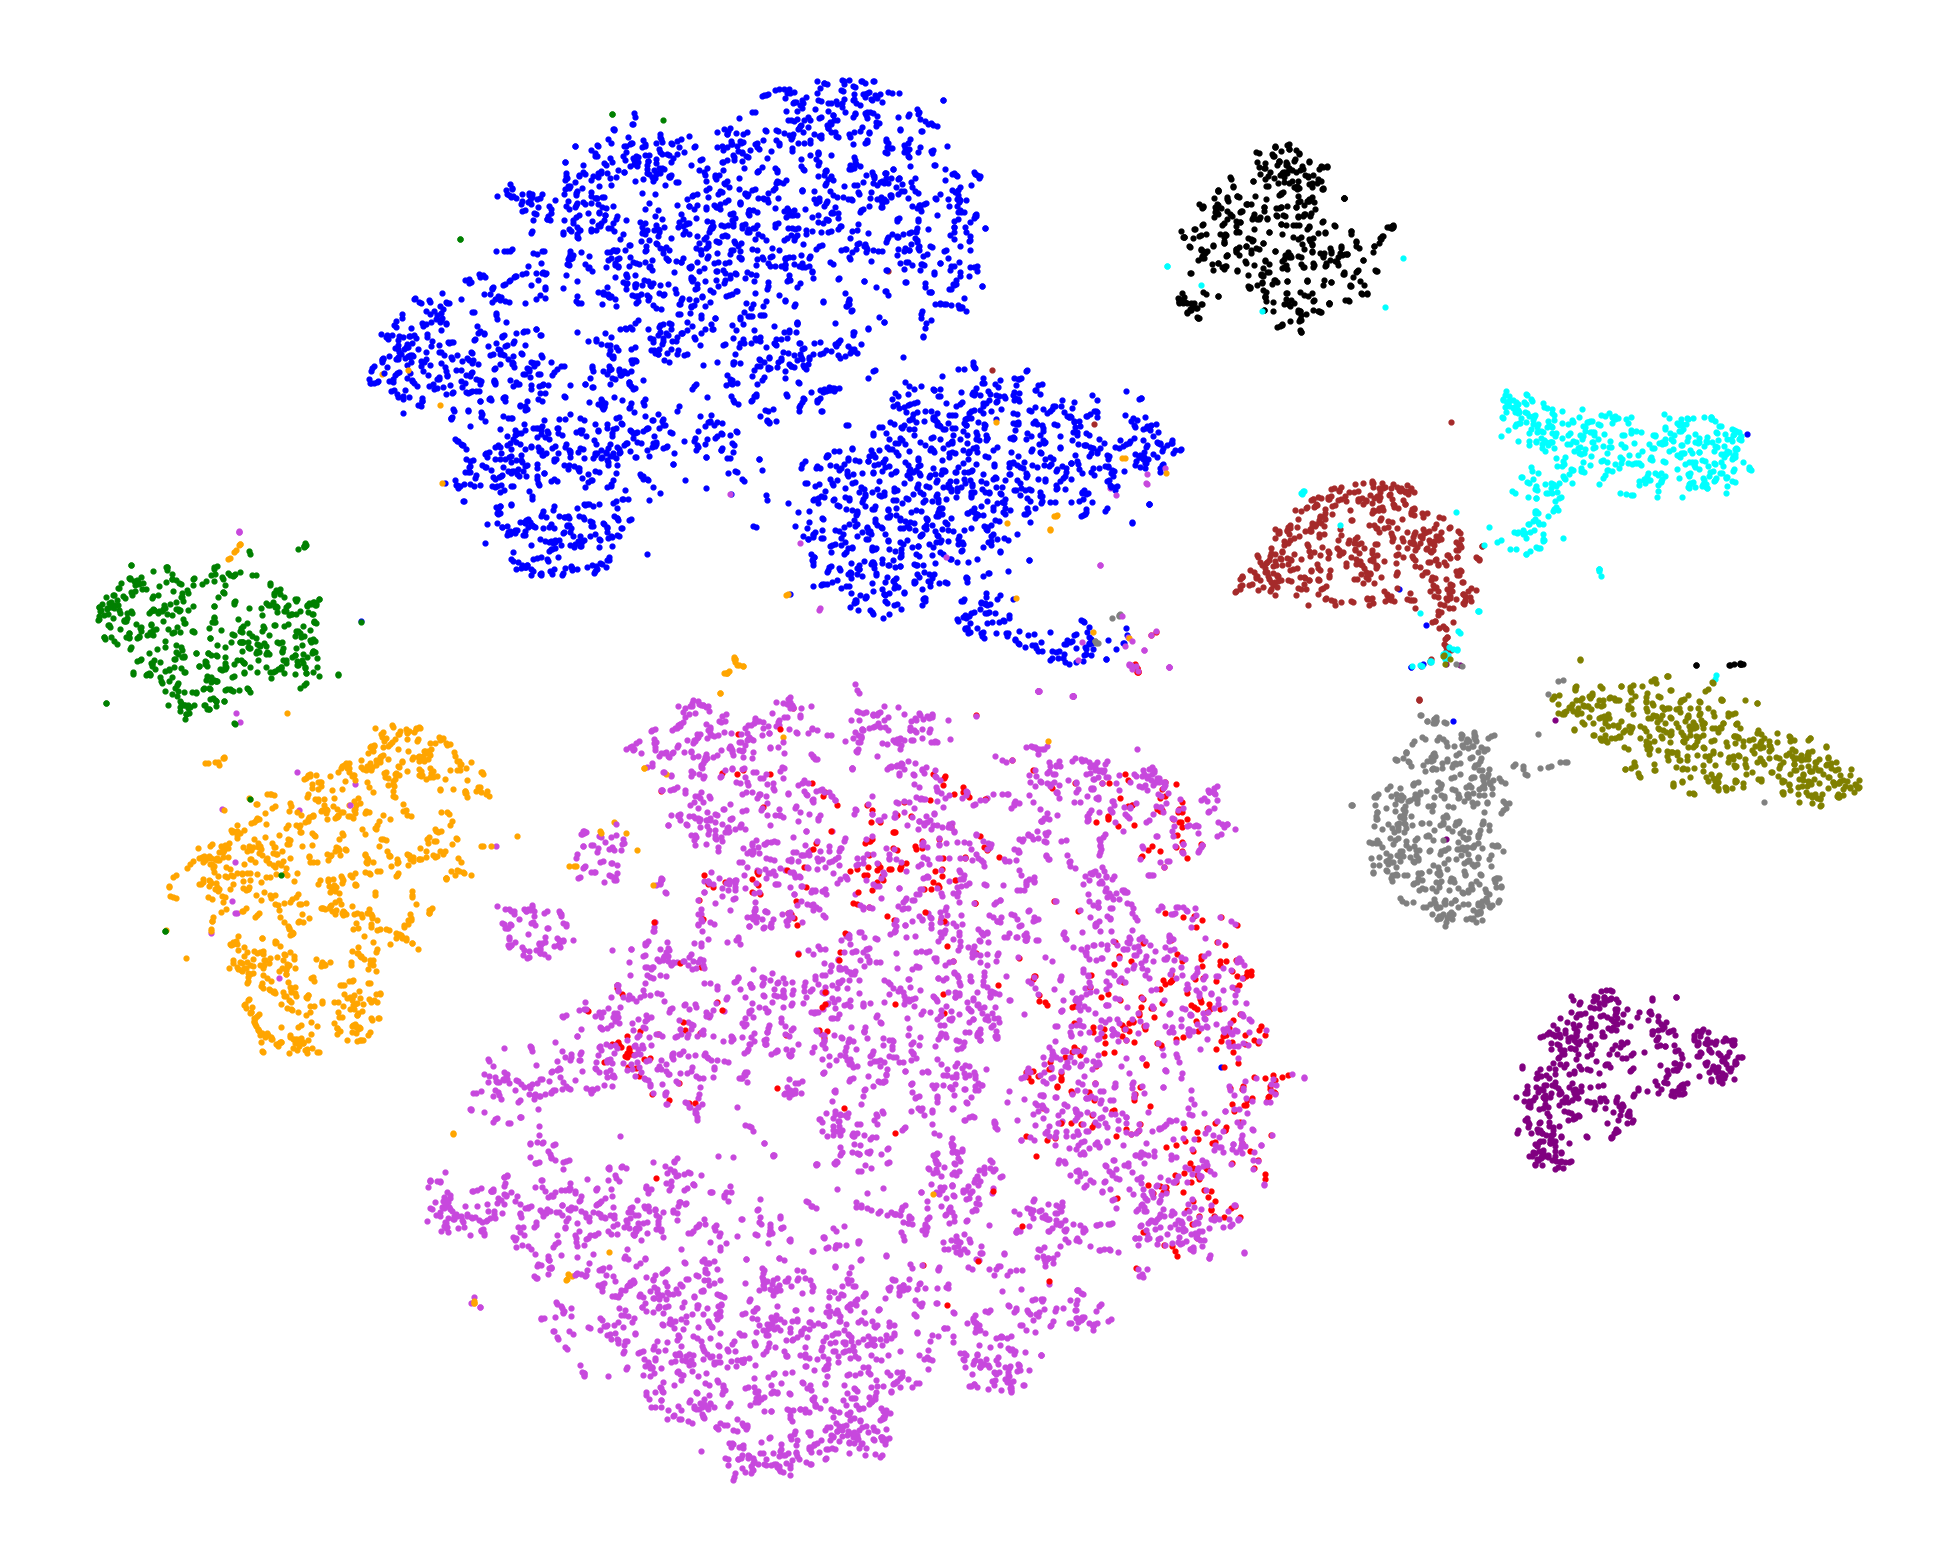

In [26]:
plt.clf()
fig = plt.figure(figsize=(25, 20))
for i in range(27):
    specie = dir_content[i]
    current_embeddings = all_embeddings_2d[i*500:(i+1)*500]
    plt.scatter(*current_embeddings.T, s=12, alpha=1., c=colors_per_type_of_specie[types_of_species[specie]], label=specie)
    
plt.box(False)
plt.axis('off')
plt.show()